# 1.Методика РГУ нефти и газа о выносе воды на участке забой - прием
К безводным скважинам будем относить такие , у которых в любой элементе системы(подьемник, устье, затрубное пространство,погружное оборудование, забой) отсутствует вода. В практике встречается, что скважины , заглушенные перед КРС, после вызова притока , в интервале забой - прием погружного оборудования может оставаться вода - вода глушения.Нефть, поступающая из пласта, всплывает в воде в виде капелек, формируя так называемый режим барботажа нефти в воде. В этом случае водонефтяная смесь в интервале «забой – прием» содержит определенное количество воды и скважина не может считаться безводной, несмотря на то, что продукция скважины – нефть, не содержит воды. 
Методика определения наличия воды глушения :

$$Re_н={ \frac{υ ̅_н∙D_c}{ν_н}}=1,274{\frac{q_н}{D_c∙ν_н }}$$

где:
$υ_н$ – приведенная скорость нефти в эксплуатационной колонне диаметром Dc, м/с,

$ν_н $  – кинематическая вязкость нефти, $м^2/с.$

Критическое число Рейнольдса для нефти ${Rе_н.кр}$– такая численная величина, для которой влияние относительной скорости нефти $υ_о$ на плотность водонефтяной смеси становится пренебрежимо малым $υ_о$ ≈ $υ_н$

Предельное число Рейнольдса для нефти Rен.пр – такая численная величина, для которой ($φ_н$  = 1 и вся вода из интервала «забой – прием» полностью выносится на дневную поверхность, для барботажа нефти через столб воды.
При обводненности равной 0, ${Rе_н.пр}$ = 850, ${Rе_н.кр}$ = 400
Если в скажину поступает обводненная продукция , то   ${Rе_н.пр}$ = 1600, ${Rе_н.кр}$ = 200



In [3]:
#Входные данные
#q_n = float (input ("q_n=")) / 86400 # дебит по нефти
#B = float(input("B = ")) / 100 #Обводненность продукции на поверхности
#D = float (input("D=")) * 1e-3 #диаметр ЭК
#mu_n = float (input("mu=")) * 1e-3 #вязкость нефти
#ro_n = float (input ("ro_n=")) #плотность нефти
#H_well = float(input("H_well =")) #глубина спуска скважины
#d = float(input("d="))*1e-3 #d НКТ
#Re = 1.274 * q_n / D / mu_n * ro_n
#H_0 = float(input("H_0=")) #глубина спуска НКТ
#H = H_well * (D ** 2) / (D ** 2 + d ** 2)
def vynos_vody(q_n =10 / 86400  ,B =0 ,D = 0.12,mu_n = 3* 1e-3 ,ro_n_field = 770,H_well = 2000,d = 0.062, H_0 =500): 
    Re_ = 1.274 * q_n / D / mu_n * ro_n_field
    H = H_well * (D ** 2) / (D ** 2 + d ** 2)

    if B == 0 :
        if H_0 > H or Re_ > 850 : #происходит вынос воды
            return 1
            print ("происходит вынос воды")
        elif  400 < Re_ < 850 :
            return 2
             
            print("Происходит частичный вынос воды",H)
        else:
            return 3
            print ("Вынос воды не происходит", H)
    else :
        if H_0 > H or Re_ > 1600 :
            return 1
            print("Происходит вынос воды")
        elif 200 < Re_ < 1600 :
            return 2
            print("Происходит частичный вынос воды")
        else: 
            return 3
            print ("Вынос воды не происходит", H)
       

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 



In [5]:
q_n = np.arange(0,100,1)
ro_n = np.arange (700,860,10)
mu_n = np.arange(0.001, 0.01,0.0001)

In [8]:
# Ввод данных(дебит) 
q_n_field = 20 #float(input()) 
vynos_vody(q_n = q_n_field / 86400)


2

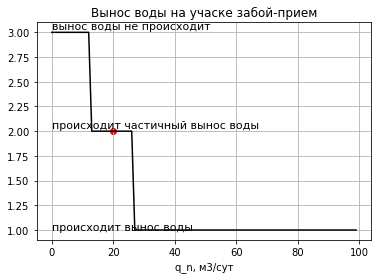

In [7]:
t = []
for q in q_n:
    x = vynos_vody(q /86400, H_0 = 500)
    t.append(x)
    
plt.xlabel("q_n, м3/сут")
plt.title("Вынос воды на учаске забой-прием")
plt.grid(True)
plt.scatter(q_n_field,vynos_vody(q_n = q_n_field / 86400),color = "red")
plt.plot(q_n ,t, color = "black" );
plt.text(0, 3.03,  'вынос воды не происходит', fontsize=11);
plt.text(0, 2.03,  'происходит частичный вынос воды', fontsize=11);
plt.text(0, 1.0,  'происходит вынос воды', fontsize=11);


In [9]:
# Ввод данных(плотность в пластовых условиях)
ro_n_field = 740 #float(input())
vynos_vody(ro_n_field=ro_n_field)

3

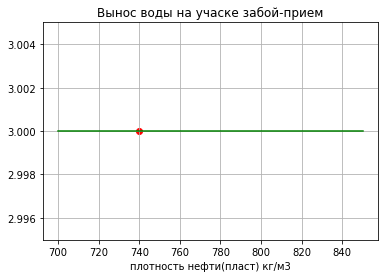

In [10]:
t = []
for ro in ro_n :
    x = vynos_vody(ro_n_field = ro, H_0 = 500)
    t.append(x)
plt.title("Вынос воды на учаске забой-прием")
plt.plot(ro_n,t, color = "green");
plt.grid(True);
plt.scatter(ro_n_field,vynos_vody(ro_n_field=ro_n_field),color = "red");
plt.xlabel("плотность нефти(пласт) кг/м3");



In [17]:
mu_n_field =5 #float(input()) мПа*с
vynos_vody(ro_n_field=ro_n_field)

3

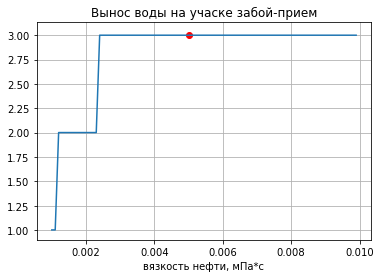

In [18]:
t = []
for mu in mu_n :
    x = vynos_vody(mu_n=mu)
    t.append(x)
plt.title("Вынос воды на учаске забой-прием")
plt.plot(mu_n,t);
plt.grid(True);
plt.scatter(mu_n_field / 1e3,vynos_vody(mu_n=mu_n_field / 1e3),color = "red");
plt.xlabel("вязкость нефти, мПа*с");